# Matplotlib
[matplotlib各种图表示例画廊](http://matplotlib.org),单击画廊中的图表，可以查看用于生成图表的代码

## 简单的折线图

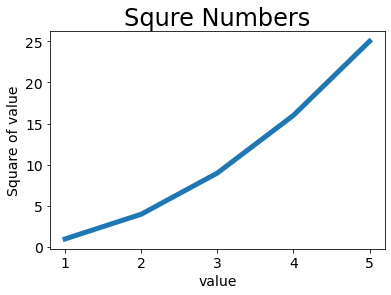

In [1]:
import matplotlib.pyplot as plt
from random import choice

input_values = [1,2,3,4,5]
square = [1,4,9,16,25]
plt.plot(input_values,square,linewidth=5) #linewidth设置线宽


#设置图标标题，字号fontsize
plt.title("Squre Numbers",fontsize=24)
#给图表的坐标加上标签
plt.xlabel("value",fontsize=14)
plt.ylabel("Square of value",fontsize=14)

#设置刻度标记的大小
plt.tick_params(axis='both',labelsize=14)
plt.show()

### 绘制散点图

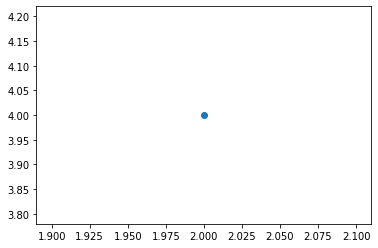

In [2]:
plt.scatter(2,4)
plt.show()


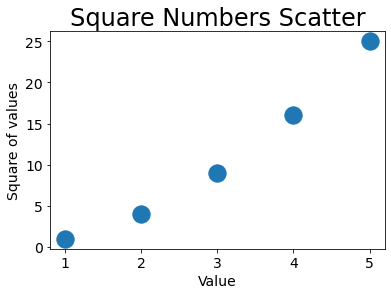

In [3]:
#绘制散点图
x_values = [1,2,3,4,5]
y_values = [1,4,9,16,25]
plt.scatter(x_values,y_values,s=300) #s是点的大小
plt.title("Square Numbers Scatter",fontsize=24)
plt.xlabel("Value",fontsize=14)
plt.ylabel("Square of values",fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.show()

### 自动计算

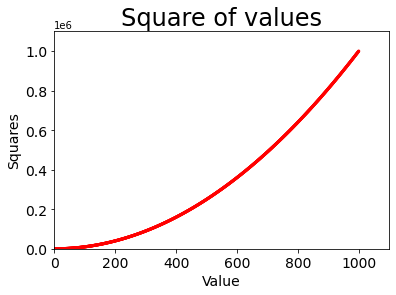

In [4]:
#自动计算数据
x_values = list(range(1,1001))
y_values = [x**2 for x in x_values]
#edgecolor默认黑色轮廓
#形参c表示颜色，还可以用RGB来表示(0,0,0.8)三个数字要在0-1之间，表示各自的分量，越靠近0颜色越深
plt.scatter(x_values,y_values, c='red', edgecolor='None', s=10)

plt.title("Square of values",fontsize=24)
plt.xlabel('Value',fontsize=14)
plt.ylabel('Squares',fontsize=14)
plt.tick_params(axis='both',labelsize = 14)

#设置每个坐标轴范围
plt.axis([0,1100,0,1100000]) #[x起始，y起始]
plt.show()

### 颜色映射

颜色映射colormap是一系列颜色，它们从起始颜色变到结束颜色。  
在可视化中，颜色映射用于突出数据的规律（用浅色显示小的值，用深色表示较大的值）  
pyplot中有内置的颜色映射

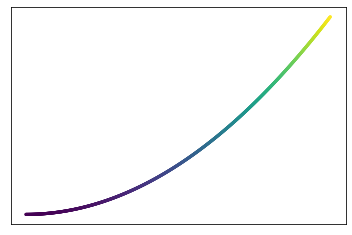

In [5]:
current_axes = plt.axes()
current_axes.xaxis.set_visible(False)
current_axes.yaxis.set_visible(False)
plt.scatter(x_values,y_values, c=y_values, cmap=plt.cm.viridis, 
    edgecolor='None', s=10)

将参数c设置成y值列表，并使用参数cmap告诉pyplot使用哪一个[颜色映射](https://matplotlib.org/stable/gallery/color/colormap_reference.html#sphx-glr-gallery-color-colormap-reference-py)，这些代码将y值较小的点设置成浅蓝色，y值较大的点设置成深蓝色  
`cmap=plt.cm.Blues`

### 自动保存文件

 `plt.savefig('squares_plot.png',bbox_inches='tight')`
第一个实参指定要以什么样的文件名保存图表，这个文件将存储到这个.py所在的目录中，第二个实参指定将图表多余的空白区域裁剪掉，如果要保留图标周围多余的空白区域，可以省略这个实参。
前面不要有plt.show()


## 随机漫步

每次行走都是完全随机的，没有明确的方向，结果是由一系列随机决策决定的。可以用来模拟现实世界中的许多情形

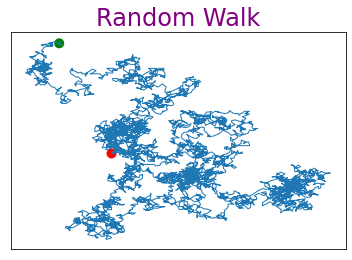

<Figure size 1280x768 with 0 Axes>

In [6]:
class Randomwalk():
    """a class used to generate the randomwalk data"""
    def __init__(self,num_points=5000):
        """initialize the attributes of randomwalk"""
        self.num_points = num_points

        #所有随机漫步都始于(0,0)
        self.x_values = [0]
        self.y_values = [0]

    def fill_walk(self):
        """计算随机漫步包含的所有点"""

        #不断漫步，直到列表达到指定的长度
        while len(self.x_values) < self.num_points:
            #决定前进方向以及沿这个方向前进的距离
            x_direction = choice([1,-1])
            x_distance = choice([0,1,2,3,4])
            x_step = x_direction * x_distance

            y_direction = choice([1,-1])
            y_distance = choice([0,1,2,3,4])
            y_step = y_direction * y_distance
            #拒绝原地踏步
            if x_step == 0 and y_step == 0:
                continue

            #计算下一个点的x和y值
            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step

            self.x_values.append(next_x)
            self.y_values.append(next_y)


rw = Randomwalk()
rw.fill_walk()
#隐藏坐标轴
current_axes = plt.axes()
current_axes.xaxis.set_visible(False)
current_axes.yaxis.set_visible(False)
 #按照漫步顺序先后着色，
point_numbers = list(range(rw.num_points))
plt.plot(rw.x_values, rw.y_values,linewidth=1)
plt.title("Random Walk",c='purple', fontsize=24)
plt.xlabel("Times",c='#0CD5DE',fontsize=20)
plt.ylabel('Route',c='#0CD5DE',fontsize=20)
plt.tick_params(axis='both',labelsize=20)
#表明起始点，并且都花在了图上（在show之前）
plt.scatter(0,0,c='green',edgecolor='none',s=100)
plt.scatter(rw.x_values[-1],rw.y_values[-1],c='red',edgecolor='none',s=100)
plt.figure(dpi=128,figsize=(10,6))
plt.show()

删除坐标，首先要plt.axes()储存到一个变量里，我理解的是创建一个实例化对象，然后访问这个对象的`xaxis`和`yaxis`这两个属性，并且调用方法`set_visible(False)`,更重要的是要放在需要画的线之前，否则正常图像无法显示出来。

设置调整图片的size
`plt.figure(dpi=128,figsize=(10,6))`

# Pygal 
矢量图，如果是在线方式显示图表，可以用这种方式来进行画图，[在线画廊](http://www.pygal.org/),可以查看示例代码

## 掷骰子

ModuleNotFoundError: No module named 'cairosvg'

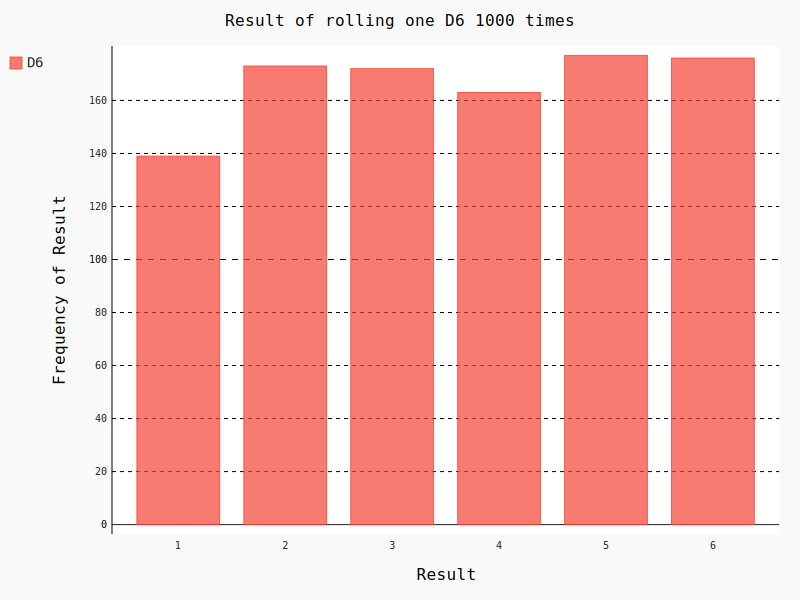

In [7]:
from random import randint
import pygal

class Die():
    """present a die class"""

    def __init__(self,num_sides=6):
        """the number of die initial faces is 6"""
        self.num_sides = num_sides

    def roll(self):
        """return an int between 1 and the number of die faces"""
        return randint(1,self.num_sides)




die = Die()
results = []
for roll_num in range(1000):
    result = die.roll()
    results.append(result)

#分析结果
frequencies = []
for value in range(1,die.num_sides+1):
    #results.count()查每个值出现的次数
    frequency = results.count(value)
    frequencies.append(frequency)

#可视化结果
hist = pygal.Bar()
hist.title = "Result of rolling one D6 1000 times"
hist.x_labels = map(str,range(1,7))
hist.x_title = "Result"
hist.y_title = "Frequency of Result"

hist.add('D6',frequencies)
#hist.render_to_file()  #保存文件

# 下载数据处理CSV文件

0 Date ∇
1 Ave. T.
(ºC)
2 Max. T.
(ºC)
3 Min. T.
(ºC)
4 Prec.
(mm)
5 S.L.Press./
Gheopot.
6 Wind dir
7 Wind sp.
(Km/h)
8 Cloud c.


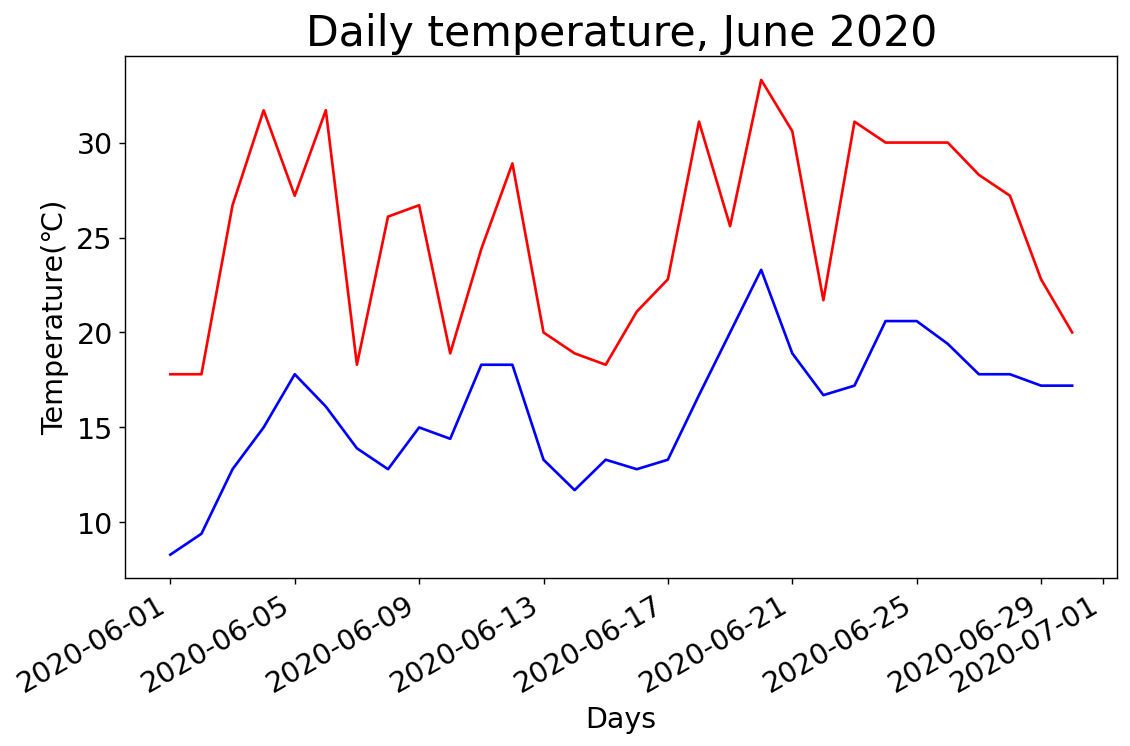

In [8]:
import csv
from datetime import datetime

filename = "1.csv"
with open(filename) as f_obj:
    #利用csv.reader()这个方法，并且传参到其中，创建一个与该文件相关联的阅读器（reader）对象
    #并且将这个阅读器对象储存到reader里。
    reader =csv.reader(f_obj)
    #next(),返回文件中的下一行，因为下面调用了一次，所以只调用了一行
    header_row = next(reader)
    
    #enumerate()获取他的索引以及其值
    for index,column_header in enumerate(header_row):
        print(index,column_header)

    dates,highs,lows = [],[],[]
    
    for row in reader:
        date = datetime.strptime(row[0],'%d/%m/%Y')
        high = float(row[2])
        low = float(row[3])
        dates.append(date)
        highs.append(high)
        lows.append(low)
    fig = plt.figure(dpi=128,figsize=(10,6))
    
    plt.plot(dates,highs,c='red')
    plt.plot(dates,lows,c='blue')
    plt.title('Daily temperature, June 2020',fontsize=24)
    plt.xlabel('Days',fontsize=16)
    #让x轴坐标不重叠
    fig.autofmt_xdate()
    plt.ylabel('Temperature(℃)',fontsize=16)
    #which指的是主刻度，次刻度，还有二者major，minor，both
    plt.tick_params(axis='both',which='major',labelsize=16)
    plt.show()

下面的代码，其中上面已经遍历过第一行了，阅读器对象从其停留的地方继续往下读取csv文件，每次都自动返回当前所处位置的下一行。开始从第二行读取

#方法strptime(arg1,arg2)第一个实参是包含所需时间的字符串，第二个实参告诉python如何设置日期的格式，两个包含的数据项必须要对应
`firstdate= datetime.strptime('2014-6-31','%Y-%m-%d')`把特定的字符串转成时间类经
`strftime`是转换为特定格式

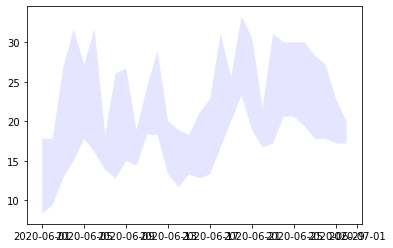

In [9]:
plt.fill_between(dates,highs,lows,facecolor='blue',alpha=0.1)#alpha表示透明度

也会存在一些情况，比如csv数据收集不完全，所以在数据处理的时候就会产生错误，使用try-exception-else结构

# Json格式

下载文献的方法可以用urllib/requests模块

In [3]:
import requests


json_url = 'http://raw.githubusercontent.com/muxuezi/btc/master/btc_close_2017.json'
req = requests.get(json_url)

with open('btc_close_2017_urllib.json','w') as f:
    f.write(req.text)
#加载json格式
file_requests =req.json()

处理上述下载的json文件

In [1]:
import json

filename = 'btc_close_2017_.json'
with open(filename) as f:
    btc_date = json.load(f)

dates =[]
months = []
weeks = []
weekdays = []
closes = []
#打印每一天的信息
for btc_dict in btc_date:
    dates.append(btc_dict['date'])
    months.append(int(btc_dict['month']))
    weeks.append(int(btc_dict['week']))
    weekdays.append(btc_dict['weekday'])
    closes.append(int(float(btc_dict['close'])))

画矢量图

In [2]:
import pygal
filename = 'btc_close_2017_.json'
with open(filename) as f:
    btc_date = json.load(f)

dates =[]
months = []
weeks = []
weekdays = []
close = []
#打印每一天的信息
for btc_dict in btc_date:
    dates.append(btc_dict['date'])
    months.append(int(btc_dict['month']))
    weeks.append(int(btc_dict['week']))
    weekdays.append(btc_dict['weekday'])
    close.append(int(float(btc_dict['close'])))

line_chart = pygal.Line(x_label_rotation=20,show_minor_x_labels=False)
line_chart.title = 'Closes ($)'
line_chart.x_labels = dates
N = 20 #坐标每隔20天显示一次
line_chart.x_labels_major = dates[::N]
line_chart.add('close price',close)
line_chart.render_to_file('close price ($).svg')

数据处理，计算平均值

In [ ]:
import pygal
from itertools import groupby
 #groupby分组函数，先把x_data和y_data对应，然后根据key来对x，y进行分类，key把元组的第一个元素作为分类标准进行分类
def draw_line(x_data,y_data,title,y_legend):
    xy_map = []
    for x,y in groupby(sorted(zip(x_data,y_data)),key=lambda _: _[0]):
        y_list = [v for _, v in y]
        xy_map.append([x,sum(y_list)/len(y_list)])
    x_unique, y_mean = [*zip(*xy_map)]
    line_chart = pygal.Line()
    line_chart.title = title
    line_chart.x_labels = x_unique
    line_chart.add(y_legend,y_mean)
    line_chart.render_to_file(title + '.svg')
    return line_chart

# web api
github api

In [1]:
import requests
#执行Web API调用,返回数据并存储响应
#sort=star意思是按照stars来进行排序
url = "https://api.github.com/search/repositories?q=language:python&sort=stars"
r = requests.get(url)
print("Status code:", r.status_code)
#将API响应存储在一个变量中
response_dict = r.json()
#处理结果
print(response_dict.keys())
print("Total respositories: ", response_dict['total_count'])

#探索有关仓库的信息
repo_dicts= response_dict['items']
print("Repositories returned: ", len(repo_dicts))

#研究第一个仓库
repo_dict = repo_dicts[0]

print("\nSelected information about first repository: ")
print('Name: ', repo_dict['name'])
print('Owner: ', repo_dict['owner']['login'])  #访问所有作者字典里的用户名
print('Stars: ', repo_dict['stargazers_count'])
print('Repository url: ', repo_dict['html_url'])
print('Created: ', repo_dict['created_at'])
print('Updated: ', repo_dict['updated_at'])
print('Description: ', repo_dict['description'])

Status code: 200
dict_keys(['total_count', 'incomplete_results', 'items'])
Total respositories:  8913106
Repositories returned:  30

Selected information about first repository: 
Name:  system-design-primer
Owner:  donnemartin
Stars:  171298
Repository url:  https://github.com/donnemartin/system-design-primer
Created:  2017-02-26T16:15:28Z
Updated:  2022-04-07T06:04:43Z
Description:  Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.


可视化

ModuleNotFoundError: No module named 'cairosvg'

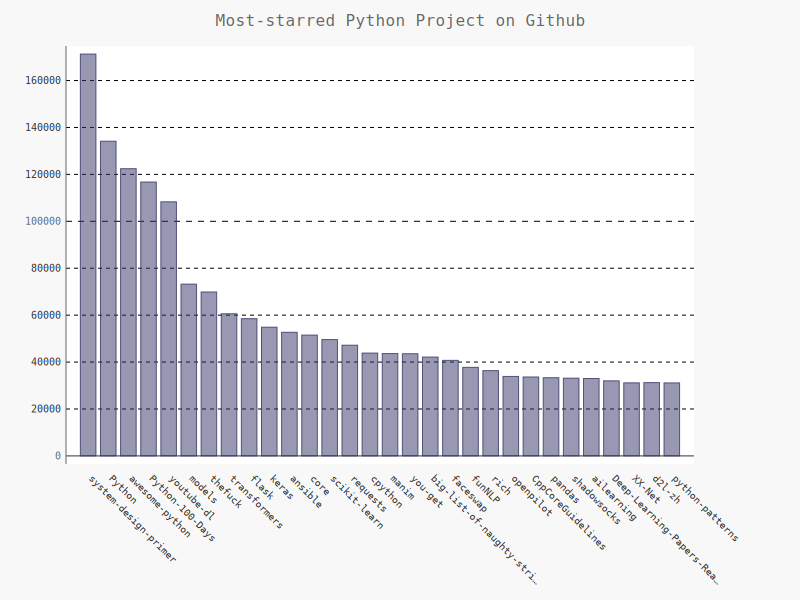

In [3]:

import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS
#探索有关仓库的信息
repo_dicts= response_dict['items']

names, stars =[], []
for repo_dict in repo_dicts:
    names.append(repo_dict['name'])
    stars.append(repo_dict['stargazers_count'])

#可视化
my_style = LS("#333366",base_style=LCS)
chart = pygal.Bar(style=my_style, x_label_rotation=45, show_legend=False) #legend图例
chart.title = 'Most-starred Python Project on Github'
chart.x_labels = names

chart.add('',stars)
#chart.render_to_file("Python_repo.svg")

定制pygal图片的一些属性

ModuleNotFoundError: No module named 'cairosvg'

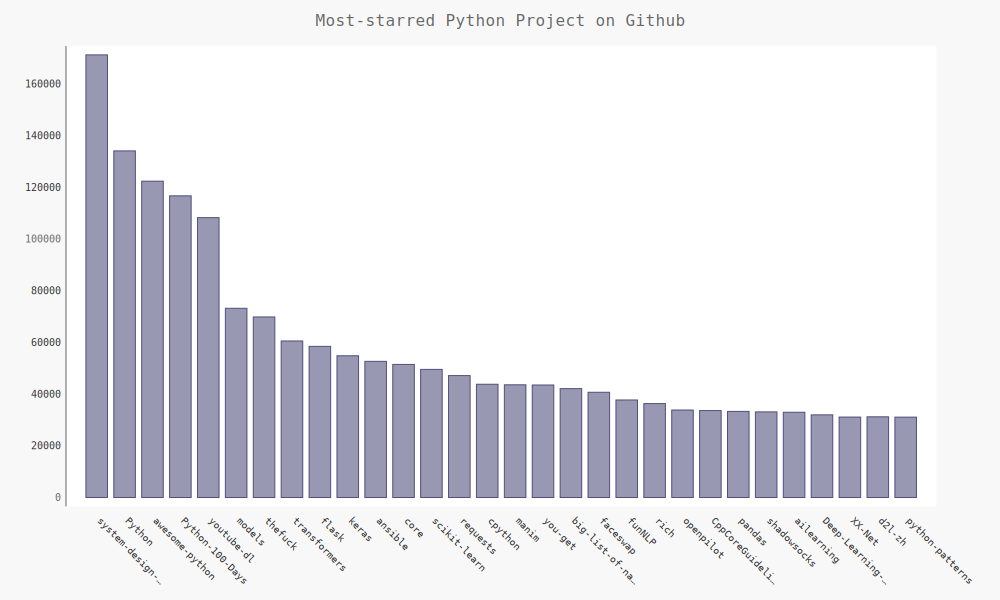

In [5]:
#定制图片的一些属性
my_config = pygal.Config() #创建属性实例
my_config.x_label_rotation = 45 
my_config.show_legend = False
my_config.title_font_size = 24
my_config.label_font_size = 14
my_config.major_label_font_size =18 #主标签更大，和副标签区分开
my_config.truncate_label = 15   #这个是将较长的字符缩短成15个字符，如果将鼠标指向该项目名，可显示完整名字
my_config.show_y_guides = False #隐藏图中的水平线
my_config.width = 1000

chart = pygal.Bar(my_config, style=my_style) #legend图例
chart.title = 'Most-starred Python Project on Github'
chart.x_labels = names

chart.add('',stars)
#chart.render_to_file("Python_repo.svg")

添加自定义工具提示
```
plot_dict= {
        'value': repo_dict['stargazers_count'],
        'label': repo_dict['description'],
        }
```

## 其他网站API的调用
[Hacker News API]('http://news.ycombinator.com/')  
跳过